In [128]:
import numpy as np
import skfuzzy as fuzz
import ipywidgets as widgets
from matplotlib import pyplot as plt

[-39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22
 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4
  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14
  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39]


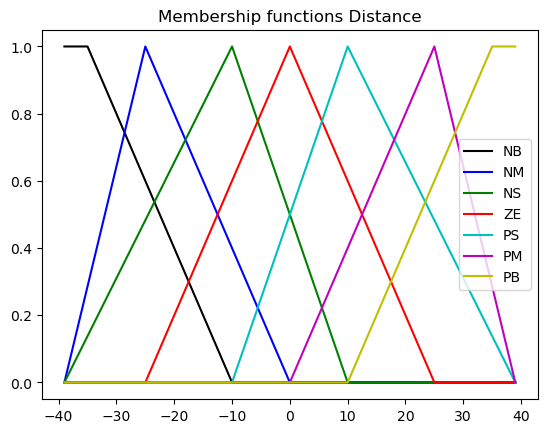

In [129]:
start = -39
stop = 40
step = 1
x = np.arange(start, stop, step)
print(x)

membership_name = ['NB', 'NM', 'NS', 'ZE', 'PS', 'PM', 'PB']
NB = fuzz.trapmf(x, [-39, -39, -35, -10])
NM = fuzz.trimf(x, [-39, -25, 0])
NS = fuzz.trimf(x, [-39, -10, 10])
ZE = fuzz.trimf(x, [-25, 0, 25])
PS = fuzz.trimf(x, [-10, 10, 39])
PM = fuzz.trimf(x, [0, 25, 39])
PB = fuzz.trapmf(x, [10, 35, 39, 39])

plt.figure()
plt.plot(x, NB, 'k', linewidth=1.5, label='NB')
plt.plot(x, NM, 'b', linewidth=1.5, label='NM')
plt.plot(x, NS, 'g', linewidth=1.5, label='NS')
plt.plot(x, ZE, 'r', linewidth=1.5, label='ZE')
plt.plot(x, PS, 'c', linewidth=1.5, label='PS')
plt.plot(x, PM, 'm', linewidth=1.5, label='PM')
plt.plot(x, PB, 'y', linewidth=1.5, label='PB')
plt.title('Membership functions Distance')
plt.legend()


In [130]:
def get_membership(value):
    result_nb = fuzz.interp_membership(x, NB, value)
    result_nm = fuzz.interp_membership(x, NM, value)
    result_ns = fuzz.interp_membership(x, NS, value)
    result_ze = fuzz.interp_membership(x, ZE, value)
    result_ps = fuzz.interp_membership(x, PS, value)
    result_pm = fuzz.interp_membership(x, PM, value)
    result_pb = fuzz.interp_membership(x, PB, value)
    return [result_nb, result_nm, result_ns, result_ze, result_ps, result_pm, result_pb]

In [131]:
def kp_rules(error,ec):
        # PB PB PM PM PS ZO ZO
        # PB PB PM PS PS ZO NS
        # PM PM PM PS ZO NS NS
        # PM PM PS ZO NS NM NM
        # PS PS ZO NS NS NM NM
        # PS ZO NS NM NM NM NB
        # ZO ZO NM NM NM NB NB
    # plot table using matplotlib

    array = [['PB', 'PB', 'PM', 'PM', 'PS', 'Z0', 'Z0'],
             ['PB', 'PB', 'PM', 'PS', 'PS', 'Z0', 'NS'],
             ['PM', 'PM', 'PM', 'PS', 'Z0', 'NS', 'NS'],
             ['PM', 'PM', 'PS', 'Z0', 'NS', 'NM', 'NM'],
             ['PS', 'PS', 'Z0', 'NS', 'NS', 'NM', 'NM'],
             ['PS', 'Z0', 'NS', 'NM', 'NM', 'NM', 'NB'],
             ['Z0', 'Z0', 'NM', 'NM', 'NM', 'NB', 'NB']]
    columns = ('ecNB', 'ecNM', 'ecNS', 'ecZE', 'ecPS', 'ecPM', 'ecPB')
    rows = ['eNB', 'eNM', 'eNS', 'eZE', 'ePS', 'ePM', 'ePB']
    fig, ax = plt.subplots()
    ax.set_axis_off()
    table = ax.table(cellText=array, colLabels=columns, rowLabels=rows, loc='center')
    table.set_fontsize(14)
    table.scale(1, 4)
    table[(error + 1, ec)].set_facecolor("red")
    plt.show()
    return array[error][ec]

In [132]:
def ki_rules(error,ec):
    # NB NB NM NM NS ZO ZO
    # NB NB NM NS NS ZO ZO
    # NB NM NS NS ZO PS PS
    # NM NM NS ZO PS PM PM
    # NM NS ZO PS PS PM PB
    # ZO ZO PS PS PM PB PB
    # ZO ZO PS PM PM PB PB

    array = [['NB', 'NB', 'NM', 'NM', 'NS', 'Z0', 'Z0'],
             ['NB', 'NB', 'NM', 'NS', 'NS', 'Z0', 'Z0'],
             ['NB', 'NM', 'NS', 'NS', 'Z0', 'PS', 'PS'],
             ['NM', 'NM', 'NS', 'Z0', 'PS', 'PM', 'PM'],
             ['NM', 'NS', 'Z0', 'PS', 'PS', 'PM', 'PB'],
             ['Z0', 'Z0', 'PS', 'PS', 'PM', 'PB', 'PB'],
             ['Z0', 'Z0', 'PS', 'PM', 'PM', 'PB', 'PB']]
    columns = ('ecNB', 'ecNM', 'ecNS', 'ecZE', 'ecPS', 'ecPM', 'ecPB')
    rows = ['eNB', 'eNM', 'eNS', 'eZE', 'ePS', 'ePM', 'ePB']
    fig, ax = plt.subplots()
    ax.set_axis_off()
    table = ax.table(cellText=array, colLabels=columns, rowLabels=rows, loc='center')
    table.set_fontsize(14)
    table.scale(1, 4)
    table[(error + 1, ec)].set_facecolor("red")
    plt.show()
    return array[error][ec]

In [133]:
def kd_rules(error,ec):
    # PS NS NB NB NB NM PS
    # PS NS NB NM NM NS ZO
    # ZO NS NM NM NS NS ZO
    # ZO NS NS NS NS NS ZO
    # ZO ZO ZO ZO ZO ZO ZO
    # OB NS PS PS PS PS PB
    # PB PM PM PS PS PS PB

    array = [['PS', 'NS', 'NB', 'NB', 'NB', 'NM', 'PS'], 
             ['PS', 'NS', 'NB', 'NM', 'NM', 'NS', 'Z0'],
             ['Z0', 'NS', 'NM', 'NM', 'NS', 'NS', 'Z0'],
             ['Z0', 'NS', 'NS', 'NS', 'NS', 'NS', 'Z0'],
             ['Z0', 'Z0', 'Z0', 'Z0', 'Z0', 'Z0', 'Z0'],
             ['OB', 'NS', 'PS', 'PS', 'PS', 'PS', 'PB'],
             ['PB', 'PM', 'PM', 'PS', 'PS', 'PS', 'PB']]
    columns = ('ecNB', 'ecNM', 'ecNS', 'ecZE', 'ecPS', 'ecPM', 'ecPB')
    rows = ['eNB', 'eNM', 'eNS', 'eZE', 'ePS', 'ePM', 'ePB']
    # add title
    fig, ax = plt.subplots()
    ax.set_axis_off()
    table = ax.table(cellText=array, colLabels=columns, rowLabels=rows, loc='center')
    table.set_fontsize(14)
    table.scale(1, 4)
    table[(error + 1, ec)].set_facecolor("red")
    plt.show()
    return array[error][ec]  

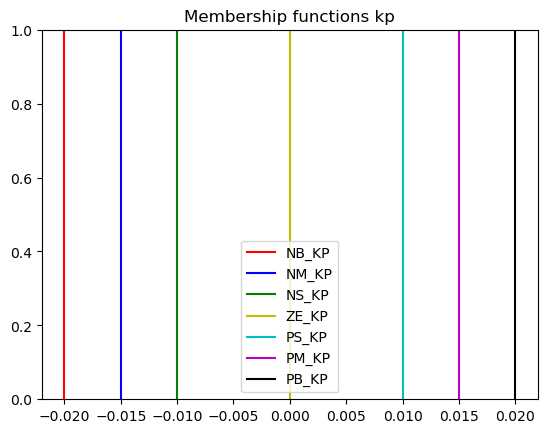

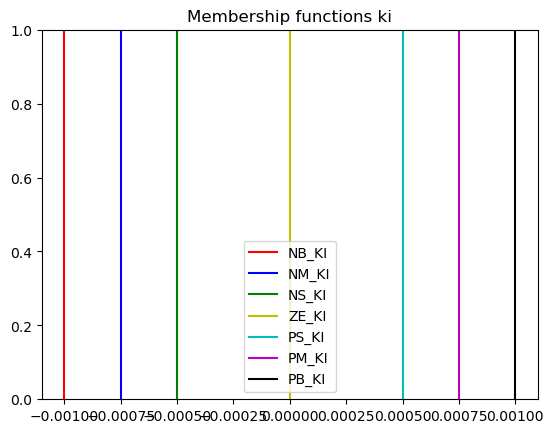

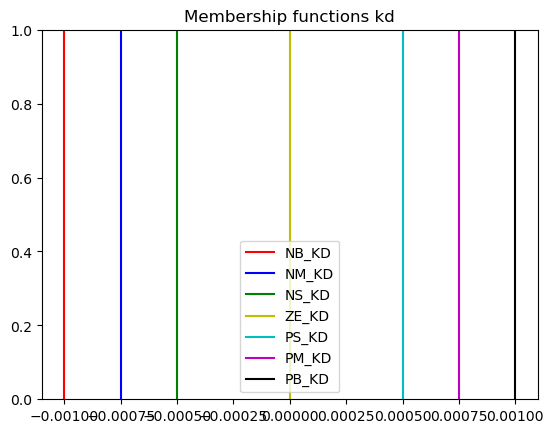

[-0.001, -0.00075, -0.0005, 0.0, 0.0005, 0.00075, 0.001]

In [134]:
kp_variabel = ['NB_KP', 'NM_KP', 'NS_KP', 'ZE_KP', 'PS_KP', 'PM_KP', 'PB_KP']
kp_value = [-0.02, -0.015, -0.01, 0.0, 0.01, 0.015, 0.02]
kp_color = ['r', 'b', 'g', 'y', 'c', 'm', 'k']

def kp_plot():
    plt.figure()
    for i in range(len(kp_variabel)):
        plt.axvline(x=kp_value[i], color=kp_color[i], linestyle='-', label=kp_variabel[i])
    plt.title('Membership functions kp')
    plt.legend()
    plt.show()
    return kp_value

ki_value = [-0.001, -0.00075, -0.0005, 0.0, 0.0005, 0.00075, 0.001]
ki_variabel = ['NB_KI', 'NM_KI', 'NS_KI', 'ZE_KI', 'PS_KI', 'PM_KI', 'PB_KI']
ki_color = ['r', 'b', 'g', 'y', 'c', 'm', 'k']

def ki_plot():
    plt.figure()
    for i in range(len(ki_variabel)):
        plt.axvline(x=ki_value[i], color=ki_color[i], linestyle='-', label=ki_variabel[i])
    plt.title('Membership functions ki')
    plt.legend()
    plt.show()
    return ki_value

kd_value = [-0.001, -0.00075, -0.0005, 0.0, 0.0005, 0.00075, 0.001]
kd_variabel = ['NB_KD', 'NM_KD', 'NS_KD', 'ZE_KD', 'PS_KD', 'PM_KD', 'PB_KD']
kd_color = ['r', 'b', 'g', 'y', 'c', 'm', 'k']

def kd_plot():
    plt.figure()
    for i in range(len(kd_variabel)):
        plt.axvline(x=kd_value[i], color=kd_color[i], linestyle='-', label=kd_variabel[i])
    plt.title('Membership functions kd')
    plt.legend()
    plt.show()
    return kd_value


kp_plot()
ki_plot()
kd_plot()

In [135]:
def str_to_idx(value):
    if value == 'NB':
        return 0
    elif value == 'NM':
        return 1
    elif value == 'NS':
        return 2
    elif value == 'Z0':
        return 3
    elif value == 'PS':
        return 4
    elif value == 'PM':
        return 5
    elif value == 'PB':
        return 6
    else:
        print('error')
    
def get_pid_values(kp,ki,kd):
    kp, ki, kd
    kp_idx = int(str_to_idx(str(kp)))
    ki_idx = int(str_to_idx(str(ki)))
    kd_idx = int(str_to_idx(str(kd)))

    return kp_value[kp_idx], ki_value[ki_idx], kd_value[kd_idx]


In [137]:
# create 2 sliders and 2 labels for e and ec
e_slider = widgets.IntSlider(min=-39, max=39, step=1, value=0, description='e Distance Eroor:')
e_label = widgets.Label(value='e Distance Error')
ec_slider = widgets.IntSlider(min=-39, max=39, step=1, value=0, description='ec Distance Eroor:')
ec_label = widgets.Label(value='ec Distance Error')
# create a button
button = widgets.Button(description='Calculate')
# create a output
output = widgets.Output()

# create a function to handle the click event
def on_button_clicked(b):
    with output:
        # clear the output
        output.clear_output()
        # get the value of the slider
        e_value = e_slider.value
        ec_value = ec_slider.value
        # get the membership
        e_membership = get_membership(e_value)
        ec_membership = get_membership(ec_value)
        print('e Distance Error: ', e_value)
        print('ec Distance Error: ', ec_value)
        # print the membership
        print('NB: ', e_membership[0])
        print('NM: ', e_membership[1])
        print('NS: ', e_membership[2])
        print('ZO: ', e_membership[3])
        print('PS: ', e_membership[4])
        print('PM: ', e_membership[5])
        print('PB: ', e_membership[6])
        e = np.argmax(e_membership)
        e_value = membership_name[e]
        print('E RESULT: ', e_value)
        print('NB: ', ec_membership[0])
        print('NM: ', ec_membership[1])
        print('NS: ', ec_membership[2])
        print('ZO: ', ec_membership[3])
        print('PS: ', ec_membership[4])
        print('PM: ', ec_membership[5])
        print('PB: ', ec_membership[6])
        ec = np.argmax(ec_membership)
        ec_value = membership_name[ec]
        print('EC RESULT: ', ec_value)
        print('\n')
        print('=============================================KP RULES=============================================')
        kp = kp_rules(e, ec)
        print('=============================================KI RULES=============================================')
        ki = ki_rules(e, ec)
        print('=============================================KD RULES=============================================')
        kd = kd_rules(e, ec)
        print('\n')
        print('==========================================PID INFERENCES========================================')
        print('kp: ', kp)
        print('ki: ', ki)
        print('kd: ', kd)
        print('\n')
        print('==========================================PID VALUES=============================================')
        kp_value, ki_value, kd_value = get_pid_values(kp, ki, kd)
        print('kp_value: ', kp_value)
        print('ki_value: ', ki_value)
        print('kd_value: ', kd_value)
button.on_click(on_button_clicked)

# display the widgets
widgets.VBox([e_slider, e_label, ec_slider, ec_label, button, output])

